# Assignment 3: EDA On Wine Quality Dataset 
**Pipeline:** EDA → Baselines → Feature Engineering → Re-evaluation → Final Report

## 0. Setup & Data Loading

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Set plotting parameters
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.grid'] = False

# Load data
df = pd.read_csv('winequality-red.csv', sep = ";")


print(df.shape)
df.head()


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


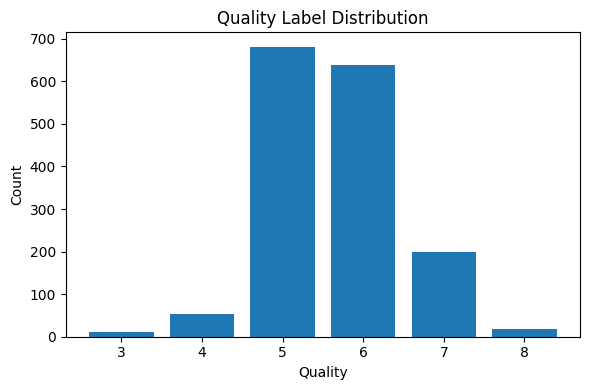

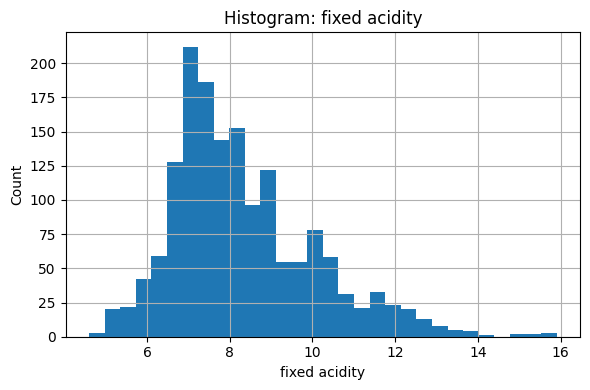

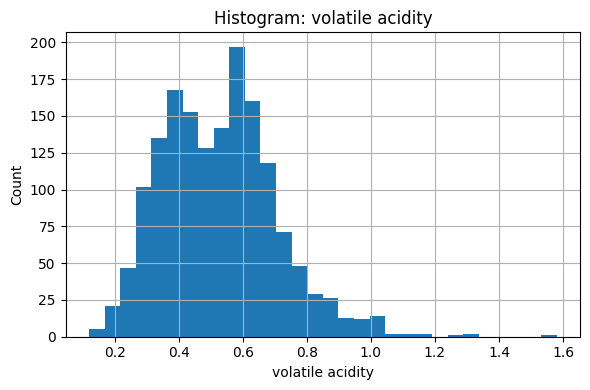

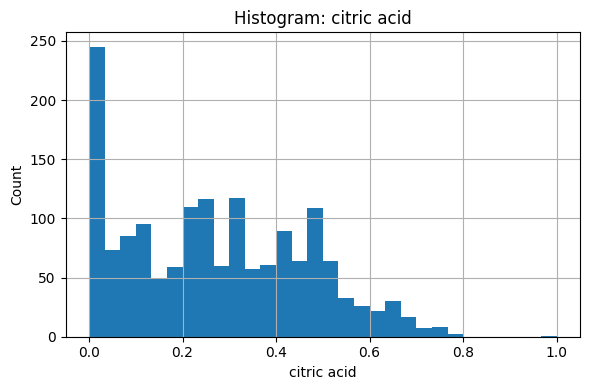

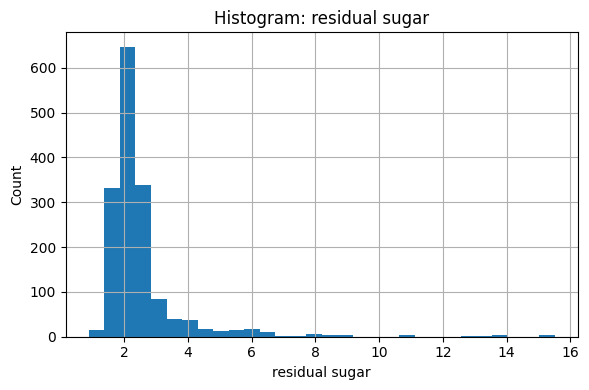

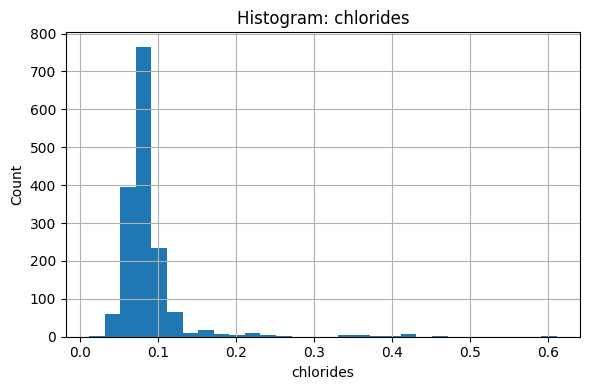

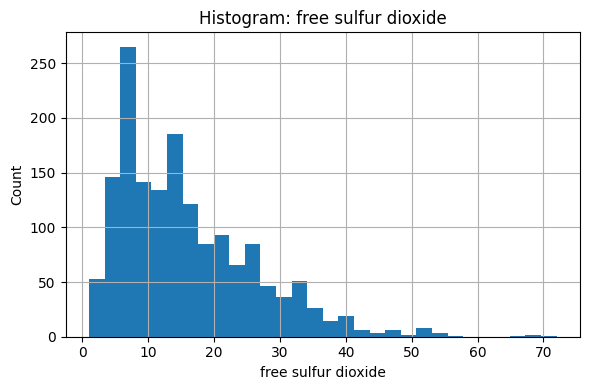

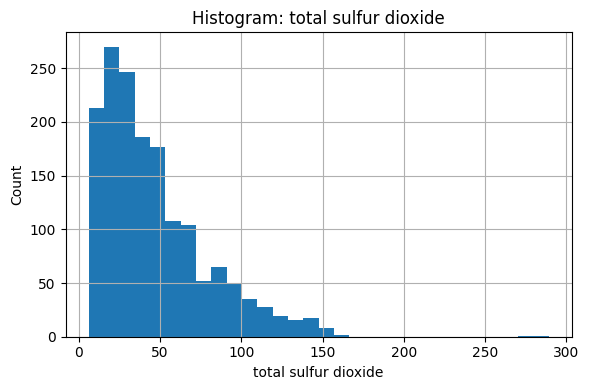

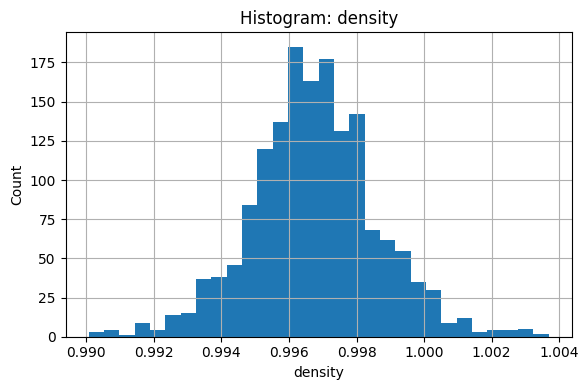

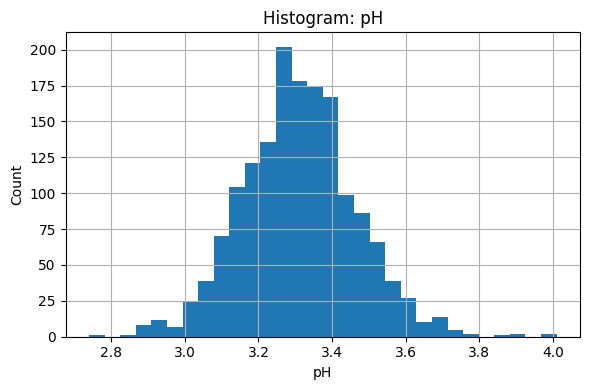

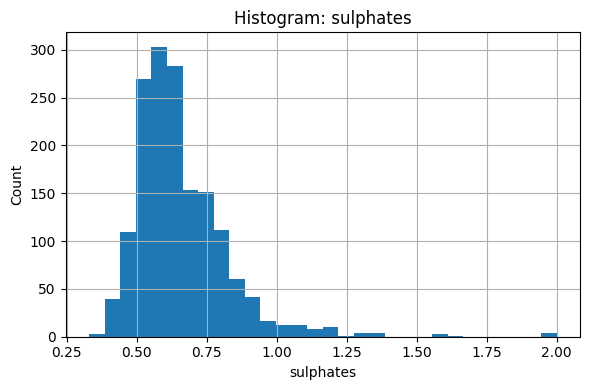

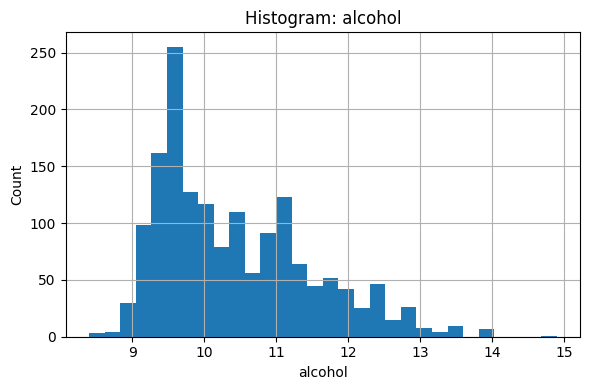

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


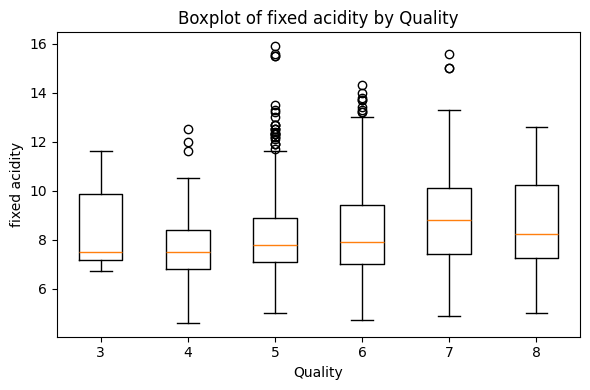

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


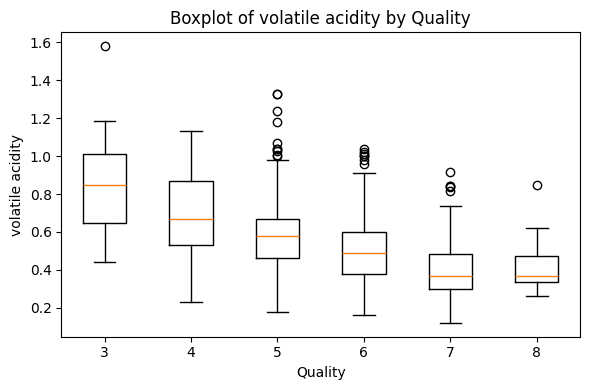

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


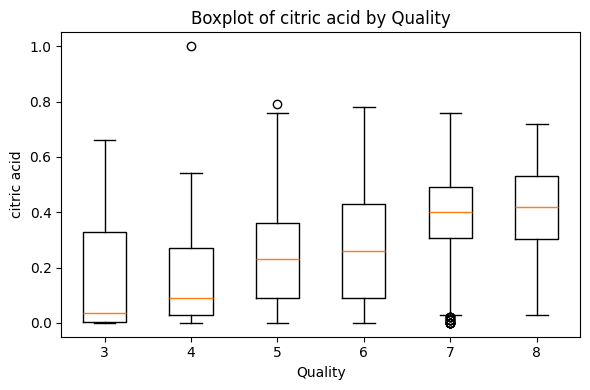

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


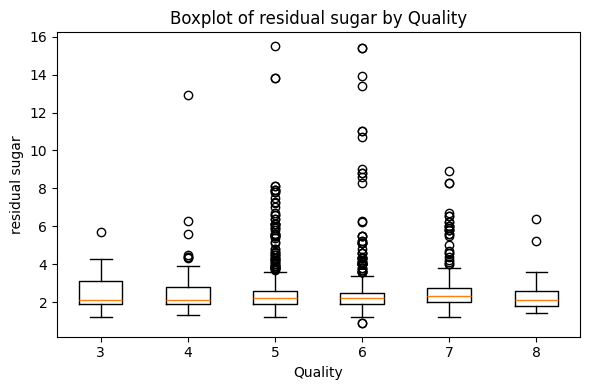

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


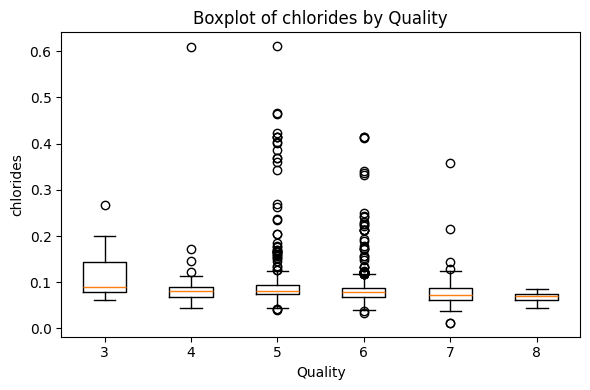

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


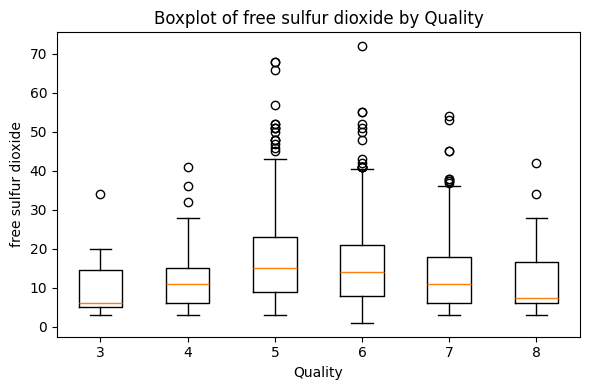

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


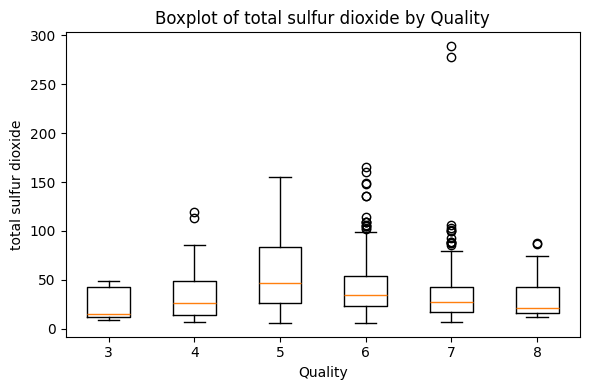

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


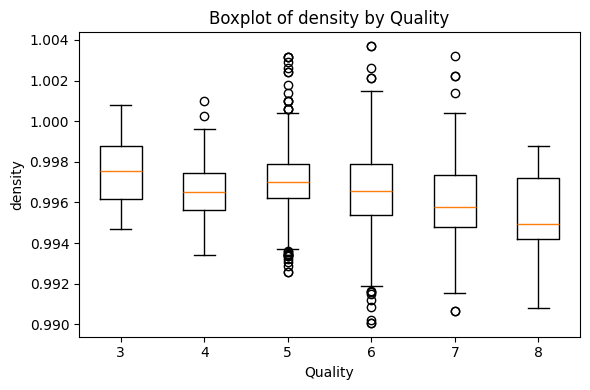

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


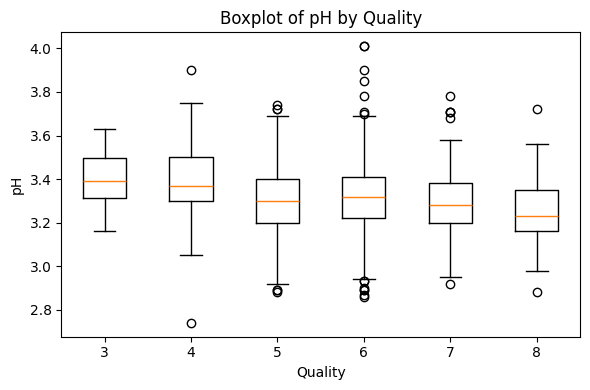

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


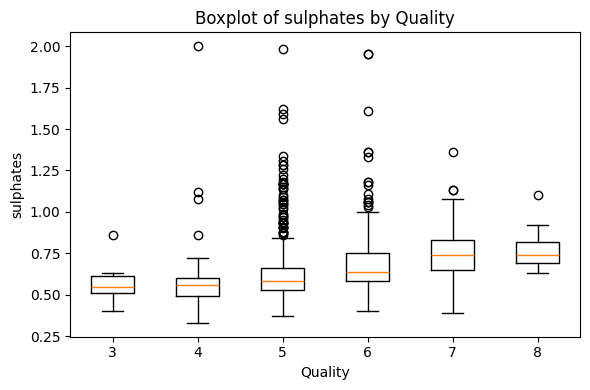

C:\Users\achut\AppData\Local\Temp\ipykernel_20636\3750743471.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_q, labels=qualities)


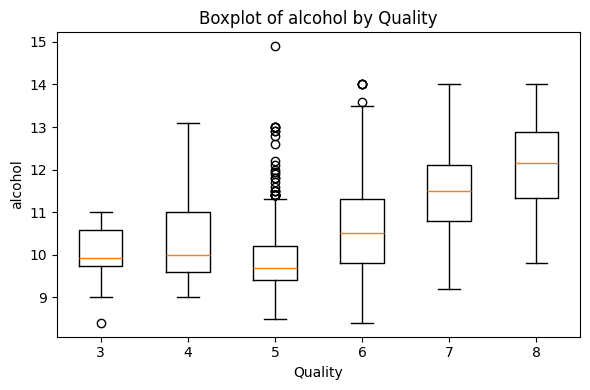

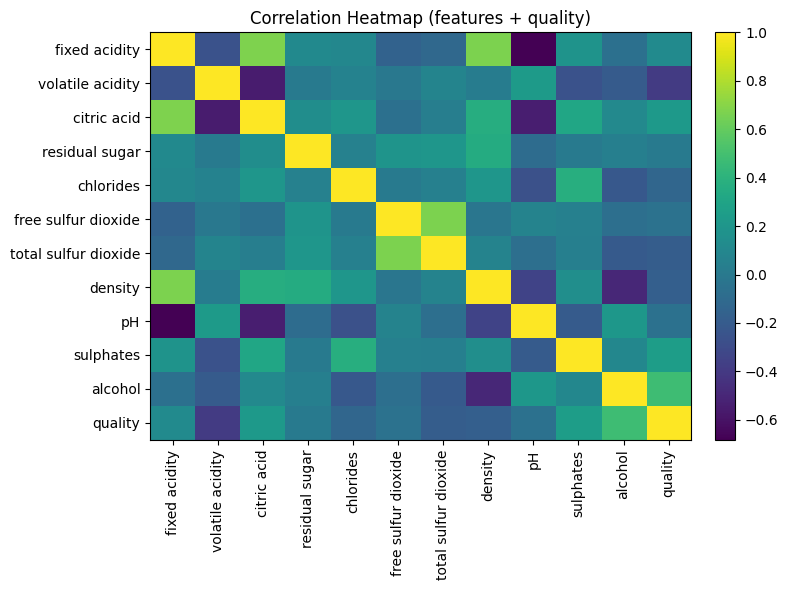

,skewness,kurtosis
chlorides,5.680347,41.715787
residual sugar,4.540655,28.617595
sulphates,2.428672,11.720251
total sulfur dioxide,1.515531,3.809824
free sulfur dioxide,1.250567,2.023562
fixed acidity,0.982751,1.132143
alcohol,0.860829,0.200029
volatile acidity,0.671593,1.225542
citric acid,0.318337,-0.788998
pH,0.193683,0.806943


In [5]:
# Basic info
display(df.info())
display(df.describe())

# Target distribution
quality_counts = df['quality'].value_counts().sort_index()
plt.figure()
plt.bar(quality_counts.index.astype(str), quality_counts.values)
plt.title("Quality Label Distribution")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

num_cols = [c for c in df.columns if c != 'quality']

# Histograms
for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Boxplots by quality
qualities = sorted(df['quality'].unique())
for col in num_cols:
    plt.figure()
    data_by_q = [df[df['quality']==q][col].values for q in qualities]
    plt.boxplot(data_by_q, labels=qualities)
    plt.title(f"Boxplot of {col} by Quality")
    plt.xlabel("Quality")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Correlation heatmap
corr = df[num_cols + ['quality']].corr()
plt.figure(figsize=(8,6))
im = plt.imshow(corr.values, aspect='auto')
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Correlation Heatmap (features + quality)")
plt.tight_layout()
plt.show()

# Skewness/Kurtosis
skewness = df[num_cols].skew()
kurtosis = df[num_cols].kurt()
sk_table = pd.DataFrame({'skewness': skewness, 'kurtosis': kurtosis}).sort_values('skewness', ascending=False)
sk_table


### 1.1 EDA Summary (Write-up)
- **Target imbalance:** Mid-quality classes dominate; extremes are rare → use macro-F1.
- **Notable associations:** Alcohol (+), volatile acidity (−), sulphates (+), density (−), citric acid (+) vs quality.
- **Skewness:** Chlorides, sulphates, residual sugar, and SO₂ variables are right-skewed → consider power transforms.
- **Collinearity:** alcohol ↔ density; free ↔ total SO₂; linear models may need scaling/regularization.


## 2. Baseline Models

In [6]:
X = df.drop(columns=['quality']).copy()
y = df['quality'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Baseline 1: Multinomial Logistic Regression (scaled)
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, multi_class='multinomial'))
])
logreg_pipe.fit(X_train, y_train)
y_pred_lr = logreg_pipe.predict(X_test)

# Baseline 2: Random Forest
rf = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from collections import OrderedDict
baseline_metrics = OrderedDict({
    'LR_accuracy': accuracy_score(y_test, y_pred_lr),
    'LR_macroF1': f1_score(y_test, y_pred_lr, average='macro'),
    'RF_accuracy': accuracy_score(y_test, y_pred_rf),
    'RF_macroF1': f1_score(y_test, y_pred_rf, average='macro'),
})
baseline_metrics

c:\Users\achut\anaconda3\envs\assignments\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


OrderedDict([('LR_accuracy', 0.590625),
             ('LR_macroF1', 0.27762808067026984),
             ('RF_accuracy', 0.684375),
             ('RF_macroF1', 0.4105780099358451)])

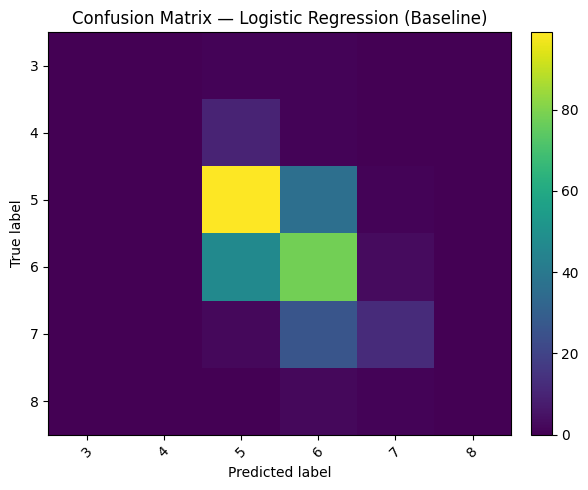

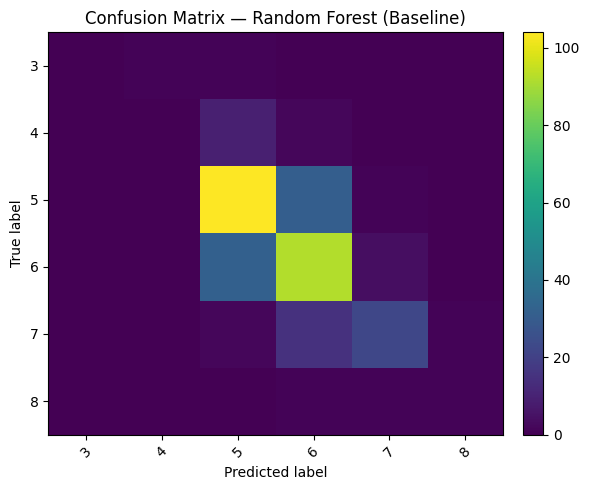

alcohol                 0.150711
sulphates               0.111560
total sulfur dioxide    0.105122
volatile acidity        0.102381
density                 0.089228
chlorides               0.080500
pH                      0.076295
fixed acidity           0.075287
residual sugar          0.072851
citric acid             0.070662
free sulfur dioxide     0.065401
dtype: float64

In [7]:
# Confusion matrices (LR and RF)
def plot_cm(cm, labels, title):
    plt.figure(figsize=(6,5))
    im = plt.imshow(cm, interpolation='nearest', aspect='auto')
    plt.title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

labels = sorted(y.unique())
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)
plot_cm(cm_lr, labels, "Confusion Matrix — Logistic Regression (Baseline)")
plot_cm(cm_rf, labels, "Confusion Matrix — Random Forest (Baseline)")

# RF feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances


## 3. Feature Engineering  Selection & Methods

**Selected features (from EDA + RF importances):** alcohol, volatile acidity, sulphates, density, citric acid, residual sugar, free/total SO₂.

**Method A (Variance Stabilization):** Yeo–Johnson power transform on skewed variables 

**Method B (Domain Features):**

- `sulfur_ratio = free SO₂ / total SO₂`

- `total_acidity = fixed + volatile + citric`

- `acid_sugar_balance = total_acidity / (residual sugar + 1)`

- `alcohol_density = alcohol / density`

Rationales: sensory balance (acid vs sugar), oxidation protection (SO₂ chemistry), disentangling alcohol vs density.

We'll show visuals/statistics via importances, confusion matrices, and metric deltas.

In [9]:
def add_domain_features(frame):
    f = frame.copy()
    eps = 1e-6
    if 'free sulfur dioxide' in f.columns and 'total sulfur dioxide' in f.columns:
        f['sulfur_ratio'] = f['free sulfur dioxide'] / (f['total sulfur dioxide'] + eps)
    if set(['fixed acidity','volatile acidity','citric acid']).issubset(f.columns):
        f['total_acidity'] = f['fixed acidity'] + f['volatile acidity'] + f['citric acid']
        if 'residual sugar' in f.columns:
            f['acid_sugar_balance'] = f['total_acidity'] / (f['residual sugar'] + 1.0)
    if 'alcohol' in f.columns and 'density' in f.columns:
        f['alcohol_density'] = f['alcohol'] / (f['density'] + eps)
    return f

X_eng = add_domain_features(X)
engineered_new = [c for c in X_eng.columns if c not in X.columns]

# Identify skewed
num_cols = X.columns.tolist()
skewness = df[num_cols].skew()
skewed_feats = skewness[skewness.abs() > 1].index.tolist()

# ColumnTransformer: Yeo-Johnson for skewed features only
pt = ColumnTransformer(
    transformers=[('yeojohnson', PowerTransformer(method='yeo-johnson'), skewed_feats)],
    remainder='passthrough'
)

# Train/test split (same as before for fairness)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X_eng, y, test_size=0.2, random_state=42, stratify=y
)

# Fit transform on train; transform test
X_train_e_t = pt.fit_transform(X_train_e)
X_test_e_t = pt.transform(X_test_e)

# Rebuild column order for readability (skewed first, passthrough after)
yeo_cols = skewed_feats
passthrough_cols = [c for c in X_eng.columns if c not in yeo_cols]
eng_cols = yeo_cols + passthrough_cols
X_train_e_t = pd.DataFrame(X_train_e_t, columns=eng_cols, index=X_train_e.index)
X_test_e_t = pd.DataFrame(X_test_e_t, columns=eng_cols, index=X_test_e.index)

engineered_new, skewed_feats[:10], X_train_e_t.head()

(['sulfur_ratio', 'total_acidity', 'acid_sugar_balance', 'alcohol_density'],
 ['residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'sulphates'],
       residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
 1542       -0.637487  -0.911734             1.212630              0.003845   
 1558        2.184210   2.580642             2.644603              1.631694   
 344         0.561305   0.112918            -1.134028             -0.238889   
 924         0.144959  -1.571957             0.056987             -0.425433   
 971        -0.637487  -0.779839            -1.134028             -1.792047   
 
       sulphates  fixed acidity  volatile acidity  citric acid  density    pH  \
 1542  -0.594585            6.7             0.855         0.02  0.99472  3.30   
 1558  -0.594585            6.9             0.630         0.33  0.99787  3.22   
 344    0.947039           11.9             0.570         0.50  1.00060  3.12   
 924    1.042115     

In [10]:
# Logistic Regression: scale AFTER Yeo–Johnson
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train_e_t)
X_test_lr = scaler.transform(X_test_e_t)

lr_eng = LogisticRegression(max_iter=2000, multi_class='multinomial')
lr_eng.fit(X_train_lr, y_train_e)
y_pred_lr_e = lr_eng.predict(X_test_lr)

# Random Forest: trees work fine on unscaled engineered features
rf_eng = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)
rf_eng.fit(X_train_e_t, y_train_e)
y_pred_rf_e = rf_eng.predict(X_test_e_t)

from collections import OrderedDict
eng_metrics = OrderedDict({
    'LR_eng_accuracy': accuracy_score(y_test_e, y_pred_lr_e),
    'LR_eng_macroF1': f1_score(y_test_e, y_pred_lr_e, average='macro'),
    'RF_eng_accuracy': accuracy_score(y_test_e, y_pred_rf_e),
    'RF_eng_macroF1': f1_score(y_test_e, y_pred_rf_e, average='macro'),
})
eng_metrics

c:\Users\achut\anaconda3\envs\assignments\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


OrderedDict([('LR_eng_accuracy', 0.590625),
             ('LR_eng_macroF1', 0.28327499338370044),
             ('RF_eng_accuracy', 0.6875),
             ('RF_eng_macroF1', 0.41006146878032995)])

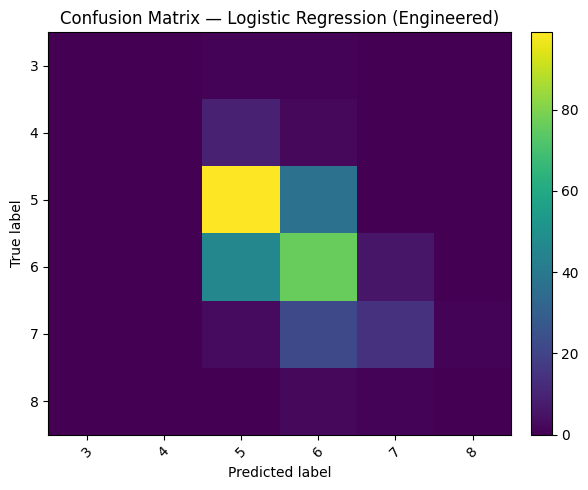

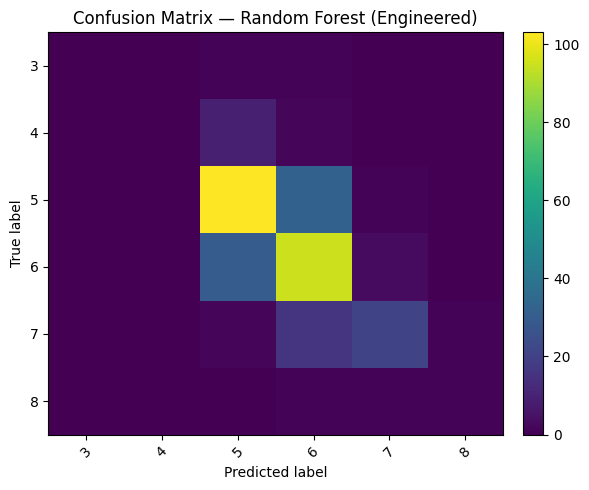

alcohol_density         0.113151
alcohol                 0.086493
sulphates               0.086088
volatile acidity        0.080023
total sulfur dioxide    0.073960
sulfur_ratio            0.066557
density                 0.061992
acid_sugar_balance      0.059316
chlorides               0.057750
pH                      0.056391
total_acidity           0.055718
citric acid             0.052781
fixed acidity           0.050520
residual sugar          0.049643
free sulfur dioxide     0.049618
dtype: float64

In [11]:
# Confusion matrices (engineered)
labels = sorted(y.unique())
cm_lr_e = confusion_matrix(y_test_e, y_pred_lr_e, labels=labels)
cm_rf_e = confusion_matrix(y_test_e, y_pred_rf_e, labels=labels)

def plot_cm(cm, labels, title):
    plt.figure(figsize=(6,5))
    im = plt.imshow(cm, interpolation='nearest', aspect='auto')
    plt.title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plot_cm(cm_lr_e, labels, "Confusion Matrix — Logistic Regression (Engineered)")
plot_cm(cm_rf_e, labels, "Confusion Matrix — Random Forest (Engineered)")

# RF importances after engineering
rf_eng_importances = pd.Series(rf_eng.feature_importances_, index=eng_cols).sort_values(ascending=False)
rf_eng_importances.head(20)


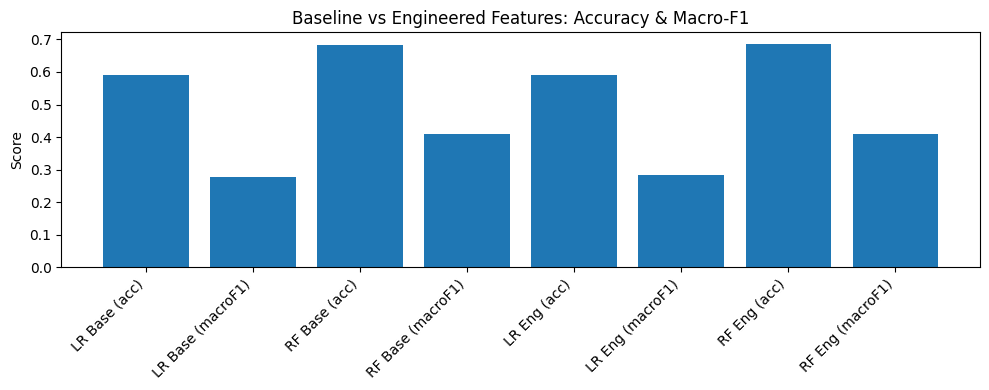

,model,accuracy,macro_f1
1,RandomForest Baseline,0.684375,0.410578
3,RandomForest Engineered,0.687500,0.410061
2,LogReg Engineered,0.590625,0.283275
0,LogReg Baseline,0.590625,0.277628


In [12]:
# Visual comparison: baseline vs engineered
labels_models = [
    "LR Base (acc)","LR Base (macroF1)",
    "RF Base (acc)","RF Base (macroF1)",
    "LR Eng (acc)","LR Eng (macroF1)",
    "RF Eng (acc)","RF Eng (macroF1)"
]
values = [
    baseline_metrics['LR_accuracy'], baseline_metrics['LR_macroF1'],
    baseline_metrics['RF_accuracy'], baseline_metrics['RF_macroF1'],
    eng_metrics['LR_eng_accuracy'], eng_metrics['LR_eng_macroF1'],
    eng_metrics['RF_eng_accuracy'], eng_metrics['RF_eng_macroF1'],
]

plt.figure(figsize=(10,4))
plt.bar(labels_models, values)
plt.xticks(rotation=45, ha='right')
plt.title("Baseline vs Engineered Features: Accuracy & Macro-F1")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

pd.DataFrame({
    'model': ['LogReg Baseline','RandomForest Baseline','LogReg Engineered','RandomForest Engineered'],
    'accuracy': [baseline_metrics['LR_accuracy'], baseline_metrics['RF_accuracy'],
                 eng_metrics['LR_eng_accuracy'], eng_metrics['RF_eng_accuracy']],
    'macro_f1': [baseline_metrics['LR_macroF1'], baseline_metrics['RF_macroF1'],
                 eng_metrics['LR_eng_macroF1'], eng_metrics['RF_eng_macroF1']]
}).sort_values('macro_f1', ascending=False)